In [1]:
"""
Package versions:
    gym=0.25.2
    tensorflow=2.6.0
    keras-rl2==1.0.5
    matplotlib==3.5.2
"""

'\nPackage versions:\n    gym=0.25.2\n    tensorflow=2.6.0\n    keras-rl2==1.0.5\n    matplotlib==3.5.2\n'

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Initialize the CartPole-v1 environment
env = gym.make("CartPole-v1")
states = env.observation_space.shape[0]
actions = env.action_space.n

print(f"States: {states}")
print(f"Actions: {actions}")

States: 4
Actions: 2


In [6]:
# Define the model
model = Sequential()
model.add(Flatten(input_shape=(1, states)))
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(actions, activation="linear"))

In [7]:
# Define the DQNAgent
agent = DQNAgent(
    model=model,
    memory=SequentialMemory(limit=50000, window_length=1),
    policy=BoltzmannQPolicy(),
    nb_actions=actions,
    nb_steps_warmup=10,
    target_model_update=0.01
)

In [8]:
# Compile the agent
agent.compile(Adam(lr=0.001), metrics=["mae"])

2024-06-27 22:48:37.912236: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Train the agent
history = agent.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: 1.0000
97 episodes - episode_reward: 101.639 [9.000, 350.000] - loss: 2.065 - mae: 19.954 - mean_q: 40.477

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 64s 6ms/step - reward: 1.0000
41 episodes - episode_reward: 245.976 [175.000, 427.000] - loss: 3.245 - mae: 43.114 - mean_q: 87.134

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 75s 7ms/step - reward: 1.0000
38 episodes - episode_reward: 260.237 [181.000, 417.000] - loss: 2.102 - mae: 46.903 - mean_q: 94.523

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 72s 7ms/step - reward: 1.0000
37 episodes - episode_reward: 273.946 [197.000, 429.000] - loss: 1.248 - mae: 45.862 - mean_q: 92.346

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: 1.0000
25 e

In [10]:
results = agent.test(env, nb_episodes=10, visualize=True)
print(f"Average reward over 10 episodes: {np.mean(results.history['episode_reward'])}")

Testing for 10 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 500.000, steps: 500
Episode 7: reward: 500.000, steps: 500
Episode 8: reward: 500.000, steps: 500
Episode 9: reward: 500.000, steps: 500
Episode 10: reward: 500.000, steps: 500
Average reward over 10 episodes: 500.0


In [11]:
# Close the environment
env.close()

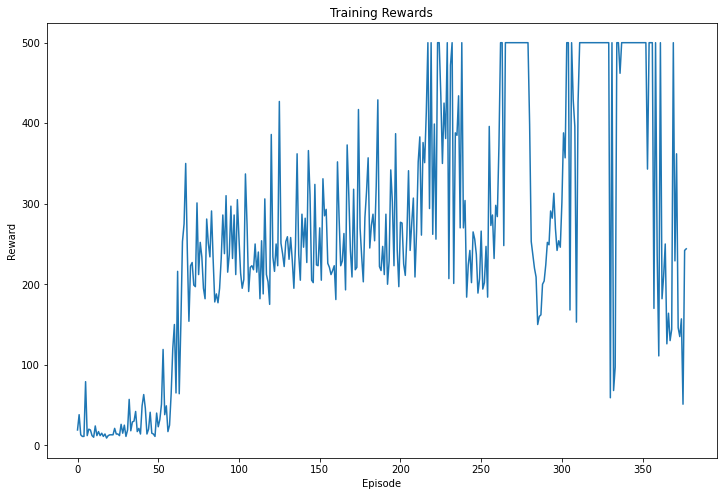

In [12]:
# Plotting the training rewards
plt.figure(figsize=(12, 8))
plt.plot(history.history['episode_reward'])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Rewards')
plt.show()